In [1]:
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("/Users/jaredvahle/CodeUp-Datascience/machine-learning-practice/telco_churn_data.csv")

In [22]:
df.head(10)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,tenure_added_to_now,avg_monthly_charges,contract_type.1,phone_type,internet_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,False,True,True,True,3,20201112,$65.60,1 Year,Two or More Lines,DSL
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,False,True,True,True,0,20201112,$59.90,Month-to-Month,One Line,Fiber Optic
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,True,True,True,0,20210421,$73.90,Month-to-Month,One Line,Fiber Optic
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,True,True,True,1,20200726,$98.00,Month-to-Month,One Line,Fiber Optic
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,True,True,True,1,20210510,$83.90,Month-to-Month,One Line,DSL
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,...,False,True,True,True,2,20201207,$69.40,Month-to-Month,One Line,Fiber Optic
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,...,False,True,True,True,1,20150815,$109.70,2 Year,Two or More Lines,Fiber Optic
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,...,False,True,True,True,1,20160430,$84.65,2 Year,One Line,DSL
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,...,False,True,True,True,0,20210112,$48.20,Month-to-Month,Two or More Lines,DSL
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,...,False,True,True,True,3,20160219,$90.45,2 Year,No Phone Service,DSL


In [4]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'Tenure', 'Tenure_cleaned',
       'is_female', 'has_churned', 'has_phone', 'has_internet',
       'has_phone_and_internet', 'partner_dependents', 'tenure_added_to_now',
       'Average_monthly_charges', 'contract_type.1', 'phone_type',
       'internet_type'],
      dtype='object')

In [5]:
df.dtypes

customer_id                 object
gender                      object
is_senior_citizen            int64
partner                     object
dependents                  object
phone_service                int64
internet_service             int64
contract_type                int64
payment_type                object
monthly_charges             object
total_charges               object
churn                       object
Tenure                     float64
Tenure_cleaned               int64
is_female                     bool
has_churned                   bool
has_phone                     bool
has_internet                  bool
has_phone_and_internet        bool
partner_dependents           int64
tenure_added_to_now          int64
Average_monthly_charges     object
contract_type.1             object
phone_type                  object
internet_type               object
dtype: object

In [6]:
df = df.drop(columns = ["Tenure"])

In [7]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'Tenure_cleaned',
       'is_female', 'has_churned', 'has_phone', 'has_internet',
       'has_phone_and_internet', 'partner_dependents', 'tenure_added_to_now',
       'Average_monthly_charges', 'contract_type.1', 'phone_type',
       'internet_type'],
      dtype='object')

In [8]:
df[df.Tenure_cleaned == 0].total_charges

945     NaN
1731    NaN
1906    NaN
2025    NaN
2176    NaN
2250    NaN
2855    NaN
3052    NaN
3118    NaN
4054    NaN
5433    NaN
Name: total_charges, dtype: object

In [9]:
df.size

169032

In [10]:
df.dropna(inplace = True)

In [11]:
df.size

168768

In [12]:
df.isnull().sum()

customer_id                0
gender                     0
is_senior_citizen          0
partner                    0
dependents                 0
phone_service              0
internet_service           0
contract_type              0
payment_type               0
monthly_charges            0
total_charges              0
churn                      0
Tenure_cleaned             0
is_female                  0
has_churned                0
has_phone                  0
has_internet               0
has_phone_and_internet     0
partner_dependents         0
tenure_added_to_now        0
Average_monthly_charges    0
contract_type.1            0
phone_type                 0
internet_type              0
dtype: int64

In [13]:
df.rename(columns = {"Tenure_cleaned":"tenure","Average_monthly_charges":"avg_monthly_charges"} , inplace = True)

In [14]:
df.tenure

0        9
1        9
2        4
3       13
4        3
        ..
7038    13
7039    22
7040     2
7041    68
7042    63
Name: tenure, Length: 7032, dtype: int64

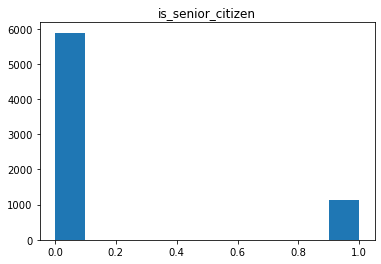

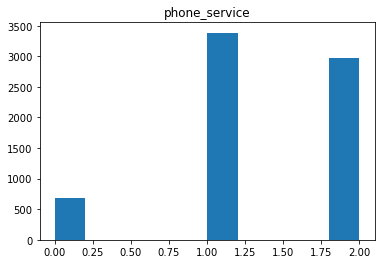

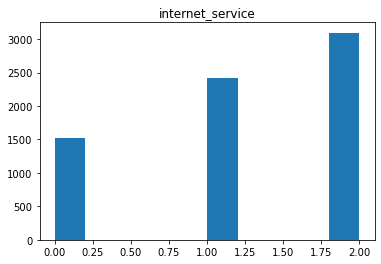

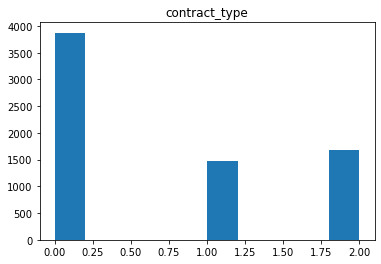

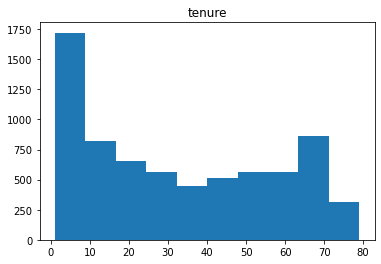

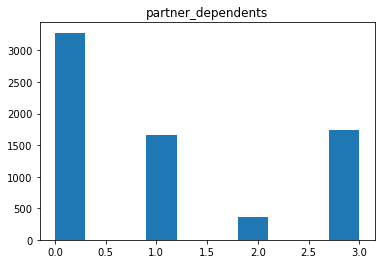

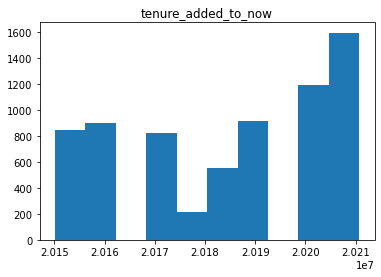

In [15]:
num_cols = df.select_dtypes(include = ["int64","float64"])

for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [16]:
df["monthly_charges"] = df.monthly_charges.apply(lambda x: x.replace("$",""))
df["total_charges"] = df.total_charges.apply(lambda x: x.replace("$",""))

In [17]:
df["total_charges"] = df.total_charges.apply(lambda x: x.replace(",",""))

In [18]:
df.total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7032, dtype: object

In [21]:
len(df) - df.has_churned.sum()

5163

In [23]:
df["auto_pay"] = df.payment_type.str.contains("automatic")

In [25]:
df.auto_pay.sum()

3063

In [27]:
df.drop(columns = ["avg_monthly_charges"],inplace = True)

In [28]:
df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,tenure_added_to_now,contract_type.1,phone_type,internet_type,auto_pay
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,False,True,True,True,3,20201112,1 Year,Two or More Lines,DSL,False
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,False,True,True,True,0,20201112,Month-to-Month,One Line,Fiber Optic,False
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,True,True,True,0,20210421,Month-to-Month,One Line,Fiber Optic,False
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,True,True,True,1,20200726,Month-to-Month,One Line,Fiber Optic,False
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,True,True,True,1,20210510,Month-to-Month,One Line,DSL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,...,False,True,True,True,0,20200701,1 Year,Two or More Lines,Fiber Optic,False
7039,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,...,True,True,True,True,1,20191015,Month-to-Month,One Line,DSL,False
7040,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,...,False,True,True,True,0,20210619,Month-to-Month,One Line,DSL,False
7041,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,...,False,True,True,True,3,20151210,2 Year,No Phone Service,DSL,False
